/var/folders/3v/6kq_73ns7j57377v07xc6t_40000gn/T/ipykernel_44734/577610046.py:45: RuntimeWarning: divide by zero encountered in divide
  delta_t = -np.log(u) / np.array(list(rates.values()))


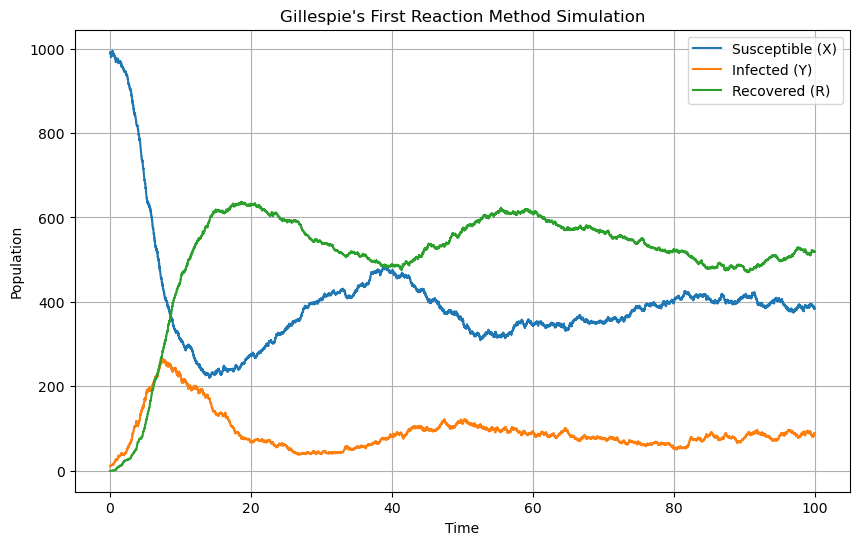

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 1
gamma = 1/3
mu = 1/20
N = 1000
X = 990
Y = N - X
R = 0
t = 0
t_max = 100  

# Initialise arrays to store results
times = [t]
X_values = [X]
Y_values = [Y]
R_values = [R]

# Define events and their effects on the state 
events = {
    "E_b": lambda x, y, r: (x+1, y, r), 
    "E_t": lambda x, y, r: (x-1, y+1, r),  
    "E_r": lambda x, y, r: (x, y-1, r+1),  
    "E_dX": lambda x, y, r: (x-1, y, r),  
    "E_dY": lambda x, y, r: (x, y-1, r),   
    "E_dR": lambda x, y, r: (x, y, r-1),   
}

while t < t_max:
    # Calculate rates
    rates = {
        "E_b": mu * N,
        "E_t": beta * (X * Y / N),
        "E_r": gamma * Y,
        "E_dX": mu * X,
        "E_dY": mu * Y,
        "E_dR": mu * R,
    }
    # Generate random numbers with length of rates to have a random number for each event
    u = np.random.uniform(0, 1, size=len(rates))
    
    # Calculate time until each event
    delta_t = -np.log(u) / np.array(list(rates.values()))
    
    # Find the event that happens first
    min_index = np.argmin(delta_t)
    event = list(events.keys())[min_index]
    
    # Update time
    t += delta_t[min_index]
    
    # Execute the event
    X, Y, R = events[event](X, Y, R)
    
    # Store results
    times.append(t)
    X_values.append(X)
    Y_values.append(Y)
    R_values.append(R)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(times, X_values, label='Susceptible (X)')
plt.plot(times, Y_values, label='Infected (Y)')
plt.plot(times, R_values, label='Recovered (R)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title("Gillespie's First Reaction Method Simulation")
plt.legend()
plt.grid(True)
plt.show()

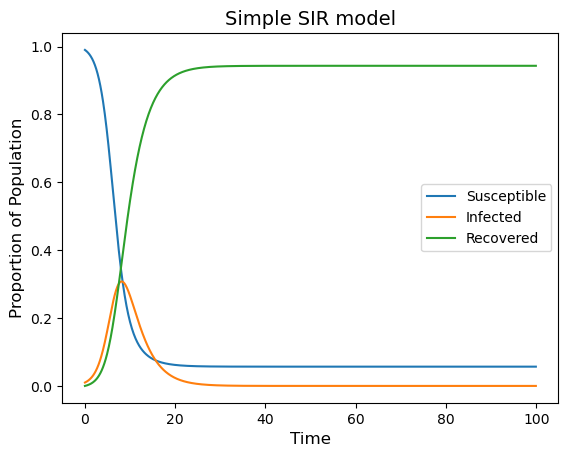